## Machine learning

Hard-coding vs fuzzy-coding. A->B->C vs "learn your way to C".

Deterministic vs probabilistic.

Websites/UX vs image classification.

![UX](https://experience.sap.com/wp-content/uploads/2015/11/screen.png)

![Images](https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/Deer_in_Glenfinnan.jpg/1200px-Deer_in_Glenfinnan.jpg)

## Shallow learning

Basic ML. Stuff you learn in stats. "Models"

- Linear/logistic regression
- SVM
- Bayes
- DecisionTrees: GradientBoost, RandomForests, XGBoost
- etc

In [57]:
# http://scikit-learn.org/stable/index.html
from sklearn.datasets import load_boston

# Numpy(underlying storage) <= Pandas(Excel)
# TODO drop numpy/pandas book here

import pandas as pd
boston = load_boston()
boston_x = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_y = pd.DataFrame(boston.target, columns=['PRICE'])
boston = pd.concat([boston_x, boston_y], 1)
boston.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


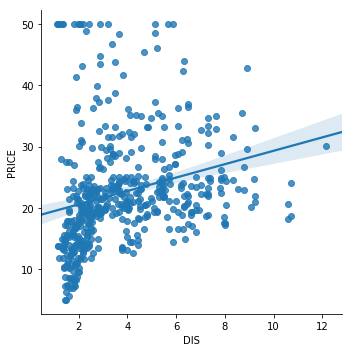

In [22]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(x='DIS', y='PRICE', data=boston, fit_reg=True) 

In [48]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(boston_x.iloc[:-10], boston_y.iloc[:-10])
model.predict(boston_x.iloc[-10:])

array([[14.04995796],
       [19.25934662],
       [21.47395357],
       [18.61215842],
       [20.64125446],
       [23.98119752],
       [22.8603563 ],
       [28.19153078],
       [26.66912492],
       [22.85155026]])

## Deep learning == Neural Networks

Hierarchical machine learning (stacked logistic regression)

![Face](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSBZhselQWAqZOZooyxDoQjYuBxucLKNISaLjeRIjsL74NgcTmYaw)

![DNN](https://miro.medium.com/max/978/0*0mia7BQKjUAuXeqZ.jpeg)

## Multi-layer Perceptron (MLP) / Feed-forward Network (FFN)

(Above)

## Recurrent Neural Network (RNN)

Natural Language Processing (NLP)

![RNN](http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png)

## Convolutional Neural Network (CNN)

![DNN](https://cdn-images-1.medium.com/max/1600/1*NQQiyYqJJj4PSYAeWvxutg.png)

Different CNN architectures: [cs231n](https://www.youtube.com/watch?v=DAOcjicFr1Y&t=4167s)

---

In [33]:
# DNN
# tensorflow, caffe, torch => keras(tensorflow) torch
from keras import backend as K
import keras.models as M
import keras.layers as L

model = M.Sequential()  # => DNN
model.add(L.Dense(4, activation='relu', input_dim=boston_x.shape[1]))
model.add(L.Dense(4, activation='relu'))
model.add(L.Dense(1))

model.compile(optimizer='adam', loss='mse')

# Train
model.fit(boston_x, boston_y, epochs=10, batch_size=32, validation_split=.8)

# Later: new data
some_new_houses = boston_x.iloc[-10:].copy()
model.predict(some_new_houses)

Train on 101 samples, validate on 405 samples
Epoch 1/10
101/101 [==============================] - 0s 3ms/step - loss: 4426.4007 - val_loss: 7192.9544
Epoch 2/10
101/101 [==============================] - 0s 138us/step - loss: 4076.0829 - val_loss: 6652.7285
Epoch 3/10
101/101 [==============================] - 0s 156us/step - loss: 3755.3397 - val_loss: 6146.1760
Epoch 4/10
101/101 [==============================] - 0s 193us/step - loss: 3452.4951 - val_loss: 5678.0915
Epoch 5/10
101/101 [==============================] - 0s 214us/step - loss: 3170.8664 - val_loss: 5244.8509
Epoch 6/10
101/101 [==============================] - 0s 217us/step - loss: 2912.4037 - val_loss: 4845.2800
Epoch 7/10
101/101 [==============================] - 0s 198us/step - loss: 2676.9835 - val_loss: 4477.9912
Epoch 8/10
101/101 [==============================] - 0s 229us/step - loss: 2459.6739 - val_loss: 4140.5008
Epoch 9/10
101/101 [==============================] - 0s 197us/step - loss: 2259.8631 - val_

array([[79.3612  ],
       [79.70069 ],
       [80.0282  ],
       [79.40884 ],
       [79.24212 ],
       [60.491524],
       [60.259563],
       [59.7219  ],
       [59.58662 ],
       [60.056942]], dtype=float32)

## Parts from above

- Model/Sequential
- Layers, Activations
  - Layers: Dense, Conv2D, LSTM, ...
  - Activations: sigmoid, relu, tanh
  - "Final" activations: none, softmax
- Compile
  - Optimizer: Adam, SGD, RMSProp, ...
  - Loss: mean_squared_error, categorical_crossentropy, ...
- model.fit
  - X, y; validation_split
  - epochs
  - batch_size
 

## Keras, TensorFlow, Torch, Caffe

TensorFlow vs Torch (forget the rest). TF current winner
Keras sits on TensorFlow; easier.

Main resource: [Keras Guide to Sequential Model](https://keras.io/getting-started/sequential-model-guide/)

Possible others (will look around):
- [Develop Your First Neural Network in Python With Keras Step-By-Step](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/)
- [Keras Tutorial: Deep Learning in Python](https://www.datacamp.com/community/tutorials/deep-learning-python)

---

## Vanilla CNN

In [ ]:
import keras.optimizers as O

# Doesn't work:
model = M.Sequential()
model.add(L.Conv2D(32, (3, 3)))
model.add(L.MaxPooling2D(pool_size=(2, 2)))

model.add(L.Conv2D(64, (3, 3)))
model.add(L.MaxPooling2D(pool_size=(2, 2)))

model.add(L.Flatten())
model.add(L.Dense(256, activation='relu'))
model.add(L.Dense(10, activation='softmax'))

opt = O.Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt)

model.fit(x_train, y_train, batch_size=32, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=32)

## Hypers
- Layers: Cov2D, MaxPool, Flatten
- LR, epochs, batch_size

## Real CNN ([Keras Tutorial](https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py))

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


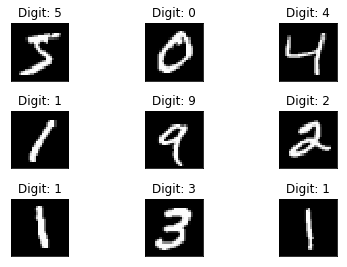

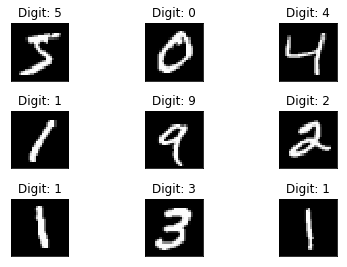

In [52]:
from keras.datasets import mnist

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [46]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = M.Sequential()
model.add(L.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(L.Conv2D(64, (3, 3), activation='relu'))
model.add(L.MaxPooling2D(pool_size=(2, 2)))
model.add(L.Dropout(0.25))
model.add(L.Flatten())
model.add(L.Dense(128, activation='relu'))
model.add(L.Dropout(0.5))
model.add(L.Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=O.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 101s 2ms/step - loss: 0.2593 - acc: 0.9191 - val_loss: 0.0524 - val_acc: 0.9840
Epoch 2/12
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0870 - acc: 0.9741 - val_loss: 0.0375 - val_acc: 0.9872
Epoch 3/12
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0669 - acc: 0.9801 - val_loss: 0.0383 - val_acc: 0.9867
Epoch 4/12
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0540 - acc: 0.9838 - val_loss: 0.0327 - val_acc: 0.9883
Epoch 5/12
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0472 - acc: 0.9865 - val_loss: 0.0308 - val_acc: 0.9892
Epoch 6/12
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0429 - acc: 0.9875 - val_loss: 0.0316 - val_acc: 0.9895
Epoch 7/12
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0387 - acc: 0.9884 - val_loss: 0.0264 - val_a

## Hypers
- Dropout
- Activation functions

![Act](https://www.kdnuggets.com/wp-content/uploads/activation.png)

## Complex CNNs. VGG-net:

In [51]:
# https://keras.io/getting-started/sequential-model-guide/#vgg-like-convnet
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

# Generate dummy data
x_train = np.random.random((100, 100, 100, 3))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
x_test = np.random.random((20, 100, 100, 3))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes=10)

model = Sequential()
# input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

model.fit(x_train, y_train, batch_size=32, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=32)

Epoch 1/10
100/100 [==============================] - 4s 36ms/step - loss: 2.3425
Epoch 2/10
100/100 [==============================] - 3s 28ms/step - loss: 2.2988
Epoch 3/10
100/100 [==============================] - 3s 29ms/step - loss: 2.2976
Epoch 4/10
100/100 [==============================] - 3s 28ms/step - loss: 2.2610
Epoch 5/10
100/100 [==============================] - 3s 28ms/step - loss: 2.2935
Epoch 6/10
100/100 [==============================] - 3s 29ms/step - loss: 2.2941
Epoch 7/10
100/100 [==============================] - 3s 28ms/step - loss: 2.2708
Epoch 8/10
100/100 [==============================] - 3s 29ms/step - loss: 2.2834
Epoch 9/10
100/100 [==============================] - 3s 28ms/step - loss: 2.2813
Epoch 10/10
20/20 [==============================] - 0s 20ms/step
